## Nikhil Agarwal - IMT2019060
## Divyanshi Rajput - IMT2019029

- Neural networks are allowed -- but only multilayer perceptrons. LSTMs, RNNs, transformers, CNNs, etc. are not allowed.

- External pre-trained models are completely banned -- SOTA language models like BERT and GPT are also banned.

- External datasets other than the given Kaggle dataset may not be used whatsoever -- however, word embeddings like GLoVe, Word2Vec, etc will be allowed.

- You are allowed to use your own laptop, Kaggle Notebooks, Colab Notebooks, and the given AWS subscription. For the sake of fairness, no other platforms will be allowed.

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv("./data/train.csv")

In [27]:
df.drop(columns = ["qid"], inplace = True)
df

,question_text,target
0,What is the role of Lua in Civ4?,0
1,What are important chapters in Kannada for 10 ...,0
2,Do musicians get royalties from YouTube?,0
3,What is the difference between Scaling Social ...,0
4,Why do elevators go super slow right before th...,0
...,...,...
653056,Which coaching centre is best in Delhi for IAS...,0
653057,Is their any API to check CIBIL score and down...,0
653058,"In paranormal shows, why do spirits talk to me...",0
653059,How does Josh Gordon have such well developed ...,0


In [28]:
df.describe()

,target
count,653061.00000
mean,0.06187
std,0.24092
min,0.00000
25%,0.00000
50%,0.00000
75%,0.00000
max,1.00000


In [29]:
df = df.head(int(len(df)*(3/100)))

In [30]:
df.describe()

,target
count,19591.000000
mean,0.061814
std,0.240824
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


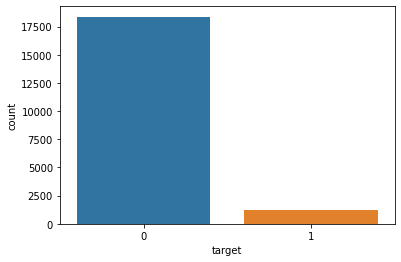

In [31]:
sns.countplot(x = df["target"])
plt.show()

## First Preprocessing
- remove stop words
- stemming

In [32]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [33]:
df["question_text"] = df["question_text"].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop))

/Users/nikhil/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
df

,question_text,target
0,what role lua civ4?,0
1,what important chapters kannada 10 icse 2018?,0
2,do musicians get royalties youtube?,0
3,what difference scaling social enterprises soc...,0
4,why elevators go super slow right doors open?,0
...,...,...
19586,why i getting electro static shocks?,0
19587,how i disassemble rossi .38?,0
19588,do think mrt lrt jakarta solved traffic jam ja...,0
19589,what news sources constant flow raw video?,0


In [35]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
stemmer = PorterStemmer()
df["question_text"] = df["question_text"].apply(lambda words: ' '.join(stemmer.stem(word) for word in words.split() if word not in stop))

/Users/nikhil/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [36]:
df

,question_text,target
0,role lua civ4?,0
1,import chapter kannada 10 ics 2018?,0
2,musician get royalti youtube?,0
3,differ scale social enterpris social franchising?,0
4,elev go super slow right door open?,0
...,...,...
19586,get electro static shocks?,0
19587,disassembl rossi .38?,0
19588,think mrt lrt jakarta solv traffic jam jakarta?,0
19589,news sourc constant flow raw video?,0


In [37]:
corpus = df["question_text"].to_list()

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [39]:
X = X.toarray()
vectorizer.get_feature_names_out()

array(['00', '000', '0001', ..., '文翰', '文言文', '보니'], dtype=object)

In [40]:
X.shape

(19591, 19994)

In [41]:
Y = df["target"]

In [42]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X, Y)

GaussianNB()

In [43]:
ypred = clf.predict(X)

In [44]:
from sklearn.metrics import f1_score
f1_score(Y, ypred, average='macro')

0.748353451056059